In [1]:
import os
import sys
path_to_specs = "../" # This needs to change if the notebook is used somewhere else
sys.path.insert(0, os.path.realpath(path_to_specs))

from pyspecs import specs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dependencies:
#    pyDigitalWaveTools 1.2 (https://pypi.org/project/pyDigitalWaveTools/)
#    pandas
#    numpy

### Calling the simulation

There are two ways of doing it. The first one is the default, with the arguments shown in the function call.

The second way uses custom_arguments as a dictionary of arguments. All arguments there are the same that can be passed to specs, with the same syntax except the - or -- before commands.

You can put the verbose variable as True to see the full SPECS output

In [2]:
# Simulating in the basic way
netlist_file = "../circuits/add_drop_pyspecs.cir"
output_file = "../traces/delete_me"
time_ms, std_out = specs.simulate(netlist_file=netlist_file, simulator_directory=path_to_specs, abstol=1e-8, reltol=1e-4, output_file=output_file, verbose=False)
print("Time in ms: ", time_ms)

Executing SPECS from python. . .
Command:  ../specs -f ../circuits/add_drop_pyspecs.cir -o ../traces/delete_me --abstol 1e-08 --reltol 0.0001
Execution finished with code:  0
Time in ms:  43.5395


In [3]:
# Simulating in the custom way. This can be used for more advanced use-cases or for 
# new features that weren't completely implemented in the wrapper yet

test_dict = {"f":"../circuits/add_drop_pyspecs.cir", "o":"../traces/delete_me", "abstol":1e-8, "reltol":1e-4}
time_ms, std_out = specs.simulate(custom_arguments=test_dict, simulator_directory=path_to_specs, verbose=False)
print("Time in ms: ", time_ms)

Executing SPECS from python. . .
Command:  ../specs -o ../traces/delete_me --abstol 1e-08 --reltol 0.0001 -f ../circuits/add_drop_pyspecs.cir
Execution finished with code:  0
Time in ms:  87.333


### Having a non-hierarchical dataframe as output

This data structure has everything in the same table directly. We chose to separate the data in two dataframes:
- df_probes: contains the probe data (optical power, field, phase, wavelength)
- df_pdet: contains the photodetector data (electric current and time)

In [4]:
(df_probes,df_pdet) = specs.parse_vcd_dataframe(output_file + '.vcd')

--- Contents of simulation ---
In df_pdet
In df_probes
	 time
	 PROBE{ROOT/N00001}/power
	 PROBE{ROOT/N00001}/abs
	 PROBE{ROOT/N00001}/phase
	 PROBE{ROOT/N00002}/power
	 PROBE{ROOT/N00002}/abs
	 PROBE{ROOT/N00002}/phase
	 PROBE{ROOT/N00003}/power
	 PROBE{ROOT/N00003}/abs
	 PROBE{ROOT/N00003}/phase
	 PROBE{ROOT/N00004}/power
	 PROBE{ROOT/N00004}/abs
	 PROBE{ROOT/N00004}/phase
	 PROBE{ROOT/add}/power
	 PROBE{ROOT/add}/abs
	 PROBE{ROOT/add}/phase
	 PROBE{ROOT/drop}/power
	 PROBE{ROOT/drop}/abs
	 PROBE{ROOT/drop}/phase
	 PROBE{ROOT/in}/power
	 PROBE{ROOT/in}/abs
	 PROBE{ROOT/in}/phase
	 PROBE{ROOT/out}/power
	 PROBE{ROOT/out}/abs
	 PROBE{ROOT/out}/phase
	 ROOT/PROBE1/power
	 ROOT/PROBE1/abs
	 ROOT/PROBE1/phase
	 ROOT/PROBE2/power
	 ROOT/PROBE2/abs
	 ROOT/PROBE2/phase
	 ROOT/PROBE3/power
	 ROOT/PROBE3/abs
	 ROOT/PROBE3/phase
Type of simulation: TD
------------------------------


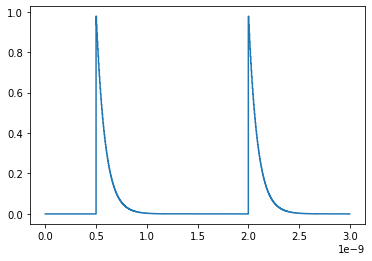

In [5]:
y = df_probes['PROBE{ROOT/out}/power']
if specs.verify_wl_sweep(df_probes):
    x = df_probes['wavelength']
else:
    x = df_probes['time']

if not specs.verify_wl_sweep(df_probes):
    plt.step(x,y,where='post')
else:
    plt.plot(x,y)

In [6]:
df_probes

,time,PROBE{ROOT/N00001}/power,PROBE{ROOT/N00001}/abs,PROBE{ROOT/N00001}/phase,PROBE{ROOT/N00002}/power,PROBE{ROOT/N00002}/abs,PROBE{ROOT/N00002}/phase,PROBE{ROOT/N00003}/power,PROBE{ROOT/N00003}/abs,PROBE{ROOT/N00003}/phase,...,PROBE{ROOT/out}/phase,ROOT/PROBE1/power,ROOT/PROBE1/abs,ROOT/PROBE1/phase,ROOT/PROBE2/power,ROOT/PROBE2/abs,ROOT/PROBE2/phase,ROOT/PROBE3/power,ROOT/PROBE3/abs,ROOT/PROBE3/phase
0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,5.000000e-10,0.000000,0.000000,0.000000,0.022500,0.150000,1.570796,0.000000,0.000000,0.000000,...,0.000000e+00,0.977500,0.988686,0.000000e+00,0.000000,0.000000,0.000000,1.0,1.0,0.0
2,5.020000e-10,0.000000,0.000000,0.000000,0.022500,0.150000,1.570796,0.022500,0.150000,1.570796,...,0.000000e+00,0.977500,0.988686,0.000000e+00,0.000506,0.022500,-3.141593,1.0,1.0,0.0
3,5.040000e-10,0.021994,0.148303,1.570796,0.087986,0.296625,1.570796,0.022500,0.150000,1.570796,...,-6.316716e-15,0.934007,0.966441,-6.316716e-15,0.000506,0.022500,-3.141593,1.0,1.0,0.0
4,5.060000e-10,0.021994,0.148303,1.570796,0.087986,0.296625,1.570796,0.087986,0.296625,1.570796,...,-6.316716e-15,0.934007,0.966441,-6.316716e-15,0.001980,0.044494,-3.141593,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,2.990000e-09,0.000569,0.023863,1.570796,0.000557,0.023593,1.570796,0.000557,0.023593,1.570796,...,-3.141593e+00,0.000013,0.003579,-3.141593e+00,0.000013,0.003539,-3.141593,0.0,0.0,0.0
1247,2.992000e-09,0.000544,0.023326,1.570796,0.000532,0.023062,1.570796,0.000557,0.023593,1.570796,...,-3.141593e+00,0.000012,0.003499,-3.141593e+00,0.000013,0.003539,-3.141593,0.0,0.0,0.0
1248,2.994000e-09,0.000544,0.023326,1.570796,0.000532,0.023062,1.570796,0.000532,0.023062,1.570796,...,-3.141593e+00,0.000012,0.003499,-3.141593e+00,0.000012,0.003459,-3.141593,0.0,0.0,0.0
1249,2.996000e-09,0.000520,0.022801,1.570796,0.000508,0.022543,1.570796,0.000532,0.023062,1.570796,...,-3.141593e+00,0.000012,0.003420,-3.141593e+00,0.000012,0.003459,-3.141593,0.0,0.0,0.0


### Helper to recover data

As SPECS is not a sampled simulator, but rather event-driven, unchanged values will not appear in the dataframe.

To make it a bit easier to recover a value by time, we created the 'find_by_time' function that automates
some of the recovery for you. 

NOTE: if you want to do it for multiple values, it is better to implement it using the Pandas framework in your own way. Check the Pandas dataframe.ffill() function. Using find_by_time in loops will result in very slow python code.

In [8]:
target_time = 2.5668e-9
specs.find_by_time(df_probes,'PROBE{ROOT/N00001}/power',target_time)

0.07090737655723536